In [1]:
import pandas as pd 
import numpy as np

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

```

### `Q-1:` 
i. Create a DataFrame birds from the above dictionary data which has the index labels. 

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [201]:
data = {
        'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']
     }
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds_df = pd.DataFrame(data, index=labels)
birds_df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [26]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [202]:
birds_df.loc[ :  : 2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:` 
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [32]:
# Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']
birds_df.iloc[[1, 3, 7], [0, 1]]

,birds,age
labels,,
b,Cranes,4.0
d,spoonbills,NaN
h,Cranes,NaN


In [36]:
# Select rows where the number of visits is less than 4.
mask = birds_df['visits'] < 4
birds_df[mask]

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:` 
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [39]:
# Select all rows with nan values in age and visits column. 
mask = (birds_df['age'].isnull()) | (birds_df['visits'].isnull())
birds_df[mask]

,birds,age,visits,priority
labels,,,,
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [51]:
# mode of any series can have more than one values.
birds_df['age'].mode()

0    3.5
1    4.0
Name: age, dtype: float64

In [52]:
# Fill nan with respective series mode value. 
birds_df['age'].fillna(birds_df['age'].mode()[0])

labels
a    3.5
b    4.0
c    1.5
d    3.5
e    6.0
f    3.0
g    5.5
h    3.5
i    8.0
j    4.0
k    3.5
Name: age, dtype: float64

In [55]:
birds_df['priority'].fillna(birds_df['priority'].mode())

labels
a    yes
b    yes
c     no
d    NaN
e     no
f     no
g     no
h    yes
i     no
j     no
k    yes
Name: priority, dtype: object

### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [210]:
# Find the total number of visits of the bird Cranes
birds_df[birds_df['birds'] == 'Cranes']['visits'].sum()

np.int64(14)

In [204]:
# Find the number of each type of birds in dataframe.
birds_df['birds'].value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [69]:
# Print no of duplicate rows 
birds_df.duplicated().sum()

np.int64(1)

In [71]:
# Drop Duplicates rows and make this changes permanent. Show dataframe after changes. 
birds_df

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no


In [73]:
birds_df.drop_duplicates(inplace=True)

In [74]:
birds_df

,birds,age,visits,priority
labels,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no


### Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

### `Q-5:` In IPL matches dataset some teams name has changed. 
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils' 
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'

```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [89]:
ipl = pd.read_csv('./Datasets/ipl-matches.csv')
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [94]:
ipl['Team1'] = ipl['Team1'].replace('Delhi Daredevils', 'Delhi Capitals')
ipl['Team2'] = ipl['Team2'].replace('Delhi Daredevils', 'Delhi Capitals')

In [102]:
ipl['Team1'] = ipl['Team1'].replace('Kings XI Punjab', 'Punjab Kings')
ipl['Team2'] = ipl['Team2'].replace('Kings XI Punjab', 'Punjab Kings')

In [103]:
ipl['Team1'] = ipl['Team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
ipl['Team2'] = ipl['Team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiants')

In [104]:
ipl.sample(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
784,419156,Dharamsala,2010-04-16,2009/10,51,Punjab Kings,Deccan Chargers,Himachal Pradesh Cricket Association Stadium,Deccan Chargers,field,N,Deccan Chargers,Wickets,5.0,NaN,RG Sharma,"['DPMD Jayawardene', 'SE Marsh', 'KC Sangakkar...","['AC Gilchrist', 'MD Mishra', 'TL Suman', 'RG ...",M Erasmus,AM Saheba
377,981011,Raipur,2016-05-22,2016,56,Delhi Capitals,Royal Challengers Bangalore,Shaheed Veer Narayan Singh International Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,6.0,NaN,V Kohli,"['Q de Kock', 'RR Pant', 'KK Nair', 'SV Samson...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'KL ...",A Nand Kishore,BNJ Oxenford
893,336039,Mumbai,2008-05-31,2007/08,Semi Final,Chennai Super Kings,Punjab Kings,Wankhede Stadium,Kings XI Punjab,bat,N,Chennai Super Kings,Wickets,9.0,NaN,M Ntini,"['PA Patel', 'S Vidyut', 'SK Raina', 'MS Dhoni...","['SE Marsh', 'JR Hopes', 'KC Sangakkara', 'Yuv...",Asad Rauf,DJ Harper
851,392223,Durban,2009-05-13,2009,43,Deccan Chargers,Delhi Capitals,Kingsmead,Deccan Chargers,field,N,Delhi Daredevils,Runs,12.0,NaN,R Bhatia,"['TL Suman', 'AC Gilchrist', 'RG Sharma', 'DB ...","['G Gambhir', 'DA Warner', 'TM Dilshan', 'AB d...",DJ Harper,SL Shastri
686,548322,Pune,2012-04-14,2012,16,Pune Warriors,Chennai Super Kings,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,N,Pune Warriors,Wickets,7.0,NaN,JD Ryder,"['RV Uthappa', 'JD Ryder', 'SC Ganguly', 'MN S...","['F du Plessis', 'M Vijay', 'SK Raina', 'MS Dh...",Aleem Dar,BNJ Oxenford


### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

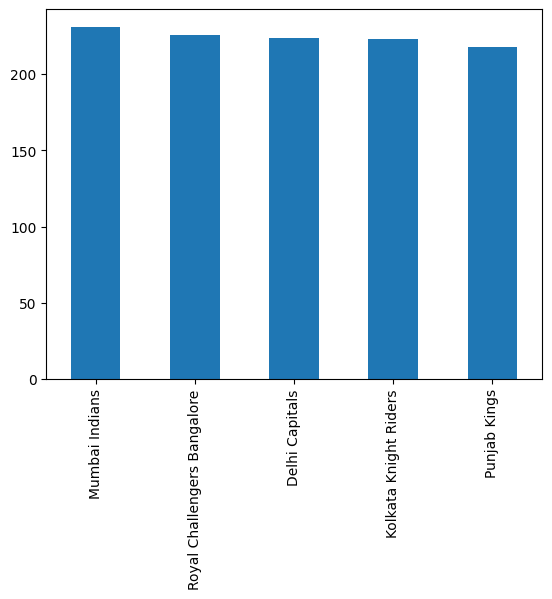

In [118]:
total_matches = ipl['Team1'].value_counts() + ipl['Team2'].value_counts()
total_matches.dropna().sort_values(ascending=False).head().plot(kind='bar')

 ### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [133]:
new_df = ipl[((ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians'))]

In [142]:
new_df[~(new_df['WinningTeam'] == 'Mumbai Indians')]['Player_of_Match'].value_counts().sort_values(ascending=False)

Player_of_Match
KL Rahul         4
SK Raina         4
SPD Smith        4
JC Buttler       3
KC Sangakkara    3
                ..
PP Ojha          1
Sohail Tanvir    1
KD Karthik       1
AC Gilchrist     1
MV Boucher       1
Name: count, Length: 68, dtype: int64

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

```

In [144]:
# write a function that can return the track record of 2 teams against each other
def track_record(team1, team2): 
    mateches_played = ipl[(ipl['Team1'] == team2) & (ipl['Team2'] == team1)].shape[0] + ipl[(ipl['Team1'] == team1) & (ipl['Team2'] == team2)].shape[0]
    # print(mateches_played)
    
    mask = (ipl['Team1'] == team2) & (ipl['Team2'] == team1)
    new_df1 = ipl[mask]
    gujrat_wins = new_df1[new_df1['WinningTeam'] == team2].shape[0]
    rajisthan_wins = new_df1[new_df1['WinningTeam'] == team1].shape[0]

    mask = (ipl['Team1'] == team1) & (ipl['Team2'] == team2)
    new_df1 = ipl[mask]
    gujrat_wins = gujrat_wins + new_df1[new_df1['WinningTeam'] == team2].shape[0]
    rajisthan_wins = rajisthan_wins + new_df1[new_df1['WinningTeam'] == team1].shape[0]

    return [rajisthan_wins, gujrat_wins, mateches_played]

team1 = 'Kolkata Knight Riders'
team2 = 'Chennai Super Kings'
result = track_record(team1, team2)

print('Total Matches played between {} and {} is : {}'.format(team1, team2, result[2]))
print('{} wins {} matches'.format(team1, result[0]))
print('{} wins {} matches'.format(team2, result[1]))

Total Matches played between Kolkata Knight Riders and Chennai Super Kings is : 26
Kolkata Knight Riders wins 9 matches
Chennai Super Kings wins 17 matches


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart. 

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

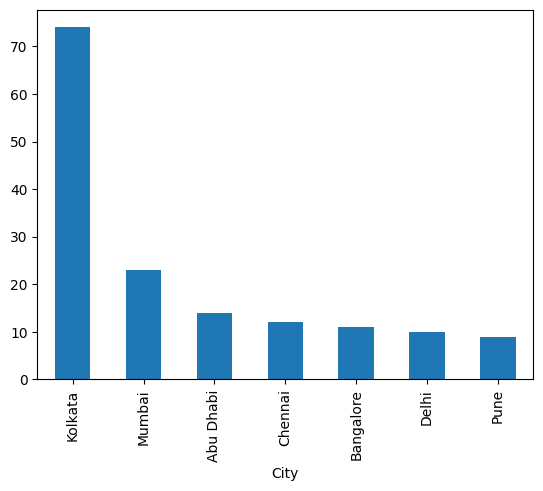

In [152]:
new_df = ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]
new_df['City'].value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

Here we are giving the margin of wickets (1 Wickets = 5 runs)

In [182]:
new_df = ipl[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team1'] == 'Mumbai Indians')]

In [191]:
another_new_df = new_df[new_df['WinningTeam'] == 'Mumbai Indians']

runs_margin = another_new_df[another_new_df['WonBy'] == 'Runs']['Margin'].mean() 
wickets_margin = another_new_df[another_new_df['WonBy'] == 'Wickets']['Margin'].mean() * 5

In [198]:
print('Margin of Mumbai Indians winning : ', np.round((runs_margin + wickets_margin) / 2, 2))

Margin of Mumbai Indians winning :  29.66
